In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
dataframe = pd.read_csv("C:/Users/shrad/OneDrive/Desktop/train.csv")

In [3]:
dataframe.head(5)

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


Air Temperature correlates to machine failures
- The process temperature refers to the minimum temperature of the heating medium that must be maintained as specified in the process schedule.
it affects tool wear.
- The rotational speed refers to the number of revolutions per minute (rpm) of the machine spindle.
- The torque is a measure of the turning force on an object such as a bolt or a flywhe.
# How Does Torque Affect Machine Failure?
- The tool wear is a measure of the wear and tear of the cutting tool.
- The machine failure is a binary variable that indicates whether a machine has failed oasons or not.

In [4]:
#count the number of type
dataframe['Type'].value_counts()

Type
L    95354
M    32152
H     8923
Name: count, dtype: int64

In [5]:
dataframe.shape

(136429, 14)

In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [7]:
dataframe.describe()

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000
mean,68214.000000,299.862776,309.941070,1520.331110,40.348643,104.408901,0.015744,0.001554,0.005160,0.002397,0.003958,0.002258
std,39383.804275,1.862247,1.385173,138.736632,8.502229,63.965040,0.124486,0.039389,0.071649,0.048899,0.062789,0.047461
min,0.000000,295.300000,305.800000,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34107.000000,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,68214.000000,300.000000,310.000000,1493.000000,40.400000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102321.000000,301.200000,310.900000,1580.000000,46.100000,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,136428.000000,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### What is a Heatmap?
- A heatmap is a graphical representation of data where the individual values contained in a matrix are represented as colors.
- Here Brighter colors indicate higher values, while darker colors indicate lower values.
- With the help of a heatmap, we can find the correlation between the features.

### What is a Correlation Matrix?
- A correlation matrix is a table showing correlation coefficients between variables.
- Each cell in the table shows the correlation between two variables.
- The value is in the range of -1 to 1.
- If two variables have high correlation, it means that the variables have a strong relationship with each other.
- If two variables have low correlation, it means that the variables have a weak relationship with each other.

In [8]:
#Make a copy without the ID and Type columns
dataframe2 = dataframe.drop(['Product ID', 'Type'], axis=1)

In [9]:
dataframe2.head(5)

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


<Axes: >

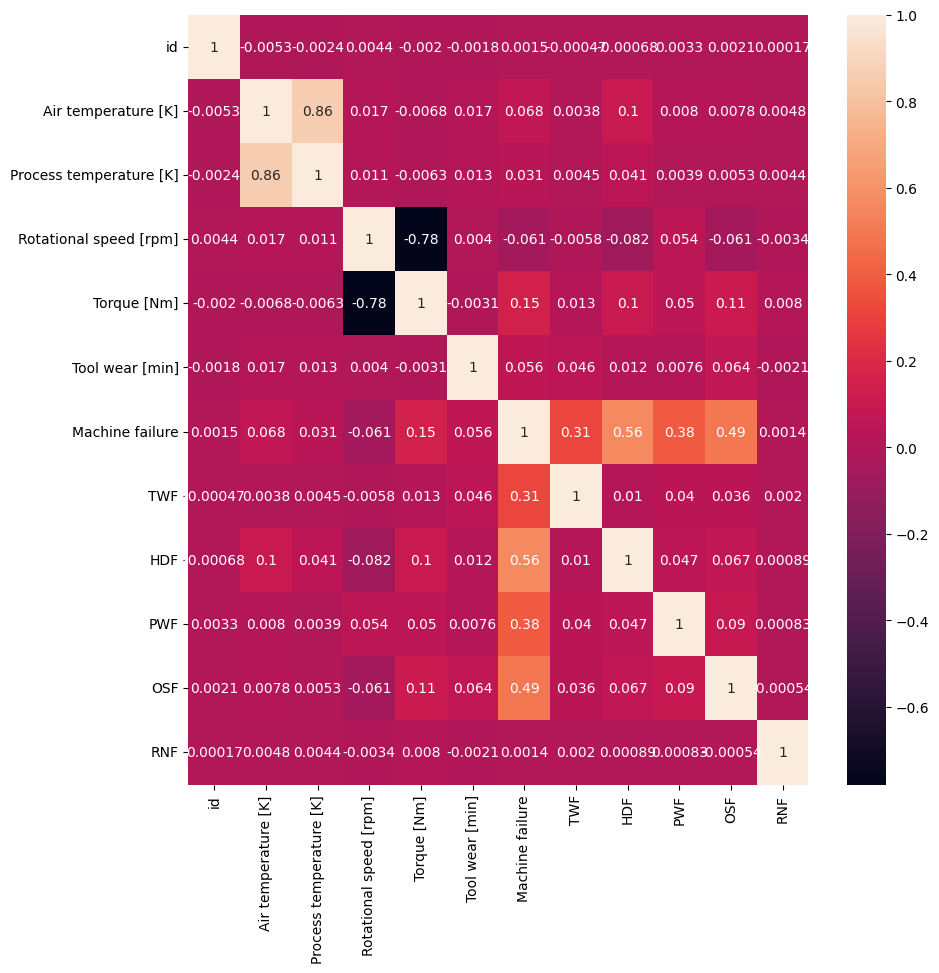

In [10]:
#Correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(dataframe2.corr(), annot=True)

In [11]:
dataframe.columns

Index(['id', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [12]:
# Check for Unique values in the columns for each column
for col in dataframe2.columns:
    print(col)
    print(len(dataframe[col].unique()))

id
136429
Air temperature [K]
95
Process temperature [K]
81
Rotational speed [rpm]
952
Torque [Nm]
611
Tool wear [min]
246
Machine failure
2
TWF
2
HDF
2
PWF
2
OSF
2
RNF
2


### Continuous Data: 
Continuous data refers to data that can take on any value within a certain range or interval. It is measured on a continuous scale and can include decimal values. Examples of continuous data include temperature, height, weight, and time.

### Categorical Data: 
Categorical data refers to data that represents different categories or groups. It consists of distinct values or labels that are not ordered or measured on a continuous scale. Examples of categorical data include gender (male or female), color (red, blue, green), and type of car (sedan, SUV, truck).

In [13]:
# Splitting data into Continuous and Categorical based on unique values and dtype
continuous = []
categorical = []
for col in dataframe.columns:
    if len(dataframe[col].unique()) < 10 or dataframe[col].dtype == 'object':
        categorical.append(col)
    else:
        continuous.append(col)


In [14]:
print(categorical)

['Product ID', 'Type', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']


In [15]:
print(continuous)

['id', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']


In [16]:
#Create a new dataframe with only the continuous columns
continuous_DF = dataframe[continuous]

In [17]:
categorical_DF = dataframe[categorical]

In [18]:
continuous_DF.head(5)

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,0,300.6,309.6,1596,36.1,140
1,1,302.6,312.1,1759,29.1,200
2,2,299.3,308.5,1805,26.5,25
3,3,301.0,310.9,1524,44.3,197
4,4,298.0,309.0,1641,35.4,34


In [19]:
categorical_DF.head(5)

,Product ID,Type,Machine failure,TWF,HDF,PWF,OSF,RNF
0,L50096,L,0,0,0,0,0,0
1,M20343,M,0,0,0,0,0,0
2,L49454,L,0,0,0,0,0,0
3,L53355,L,0,0,0,0,0,0
4,M24050,M,0,0,0,0,0,0


## Analysis of Continuous Data

### What is a pairplot?
- A pairplot is a plot where the relationship between two variables is plotted on the x and y-axis, and the relationship between the other variables is plotted on the other axes.
- It is used to visualize the relationship between two variables and the distribution of the variables.

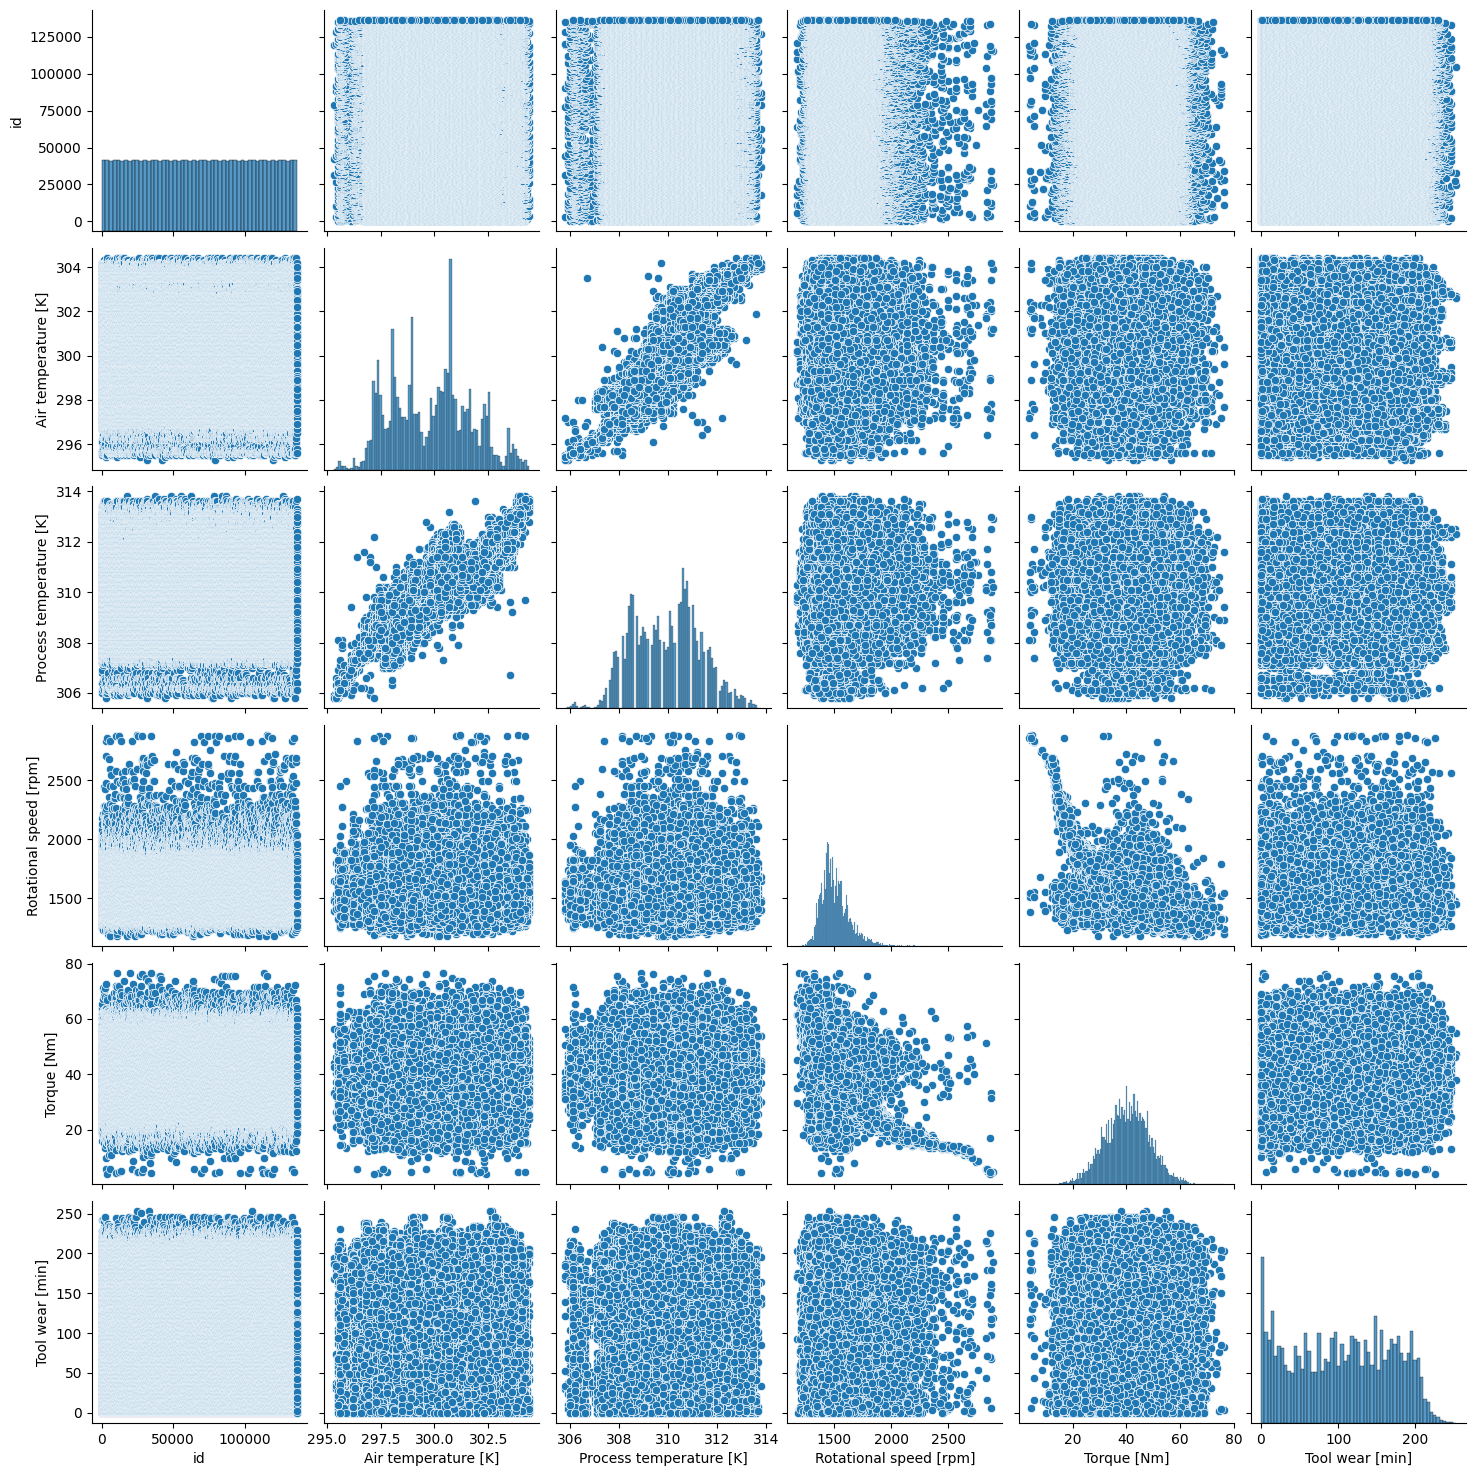

In [21]:
# Do a pairplot of the continuous variables

sns.pairplot(continuous_DF)


## Histogram
- A histogram is a graphical representation of the distribution of numerical data.
- It is an estimate of the probability distribution of a continuous variable.
- It is a kind of bar graph.

### Air Temperature
- The air temperature is bipedal histogram.
### Rotation Speed 
- Its tail is on the right side, so it is positively skewed.
### Torque
- Its tail is not on either side, so it is normally distributed.

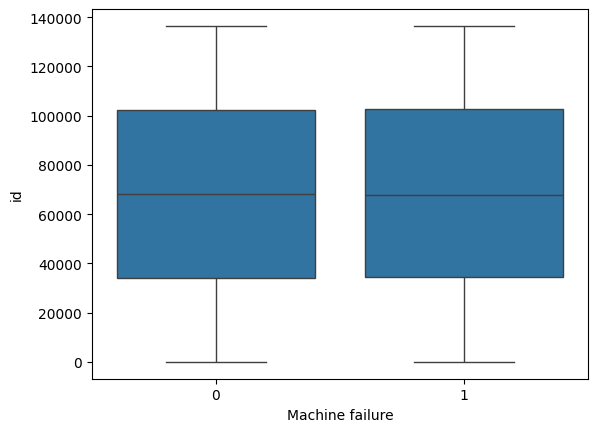

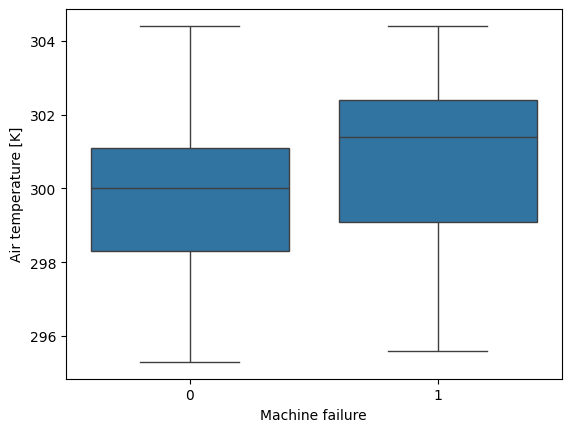

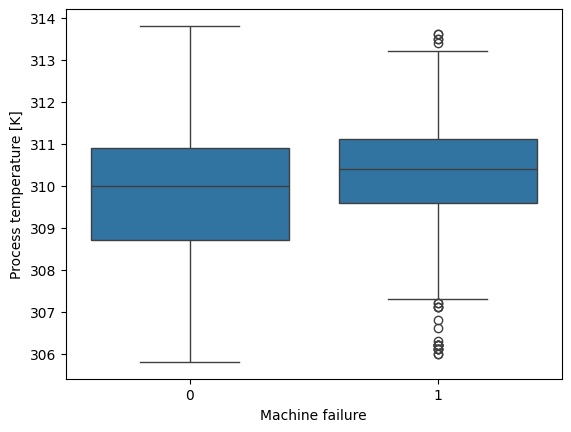

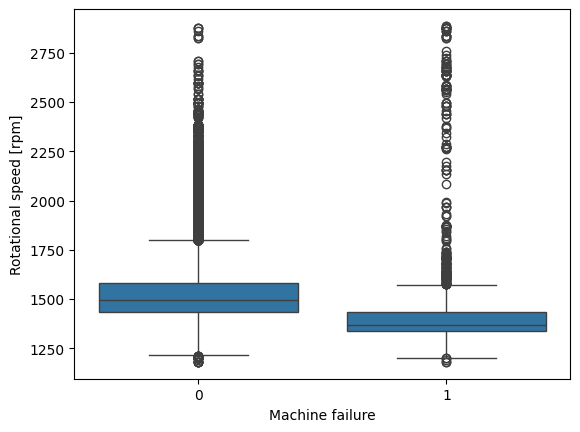

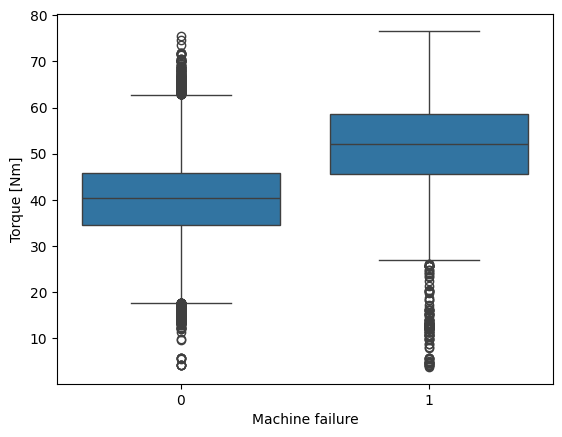

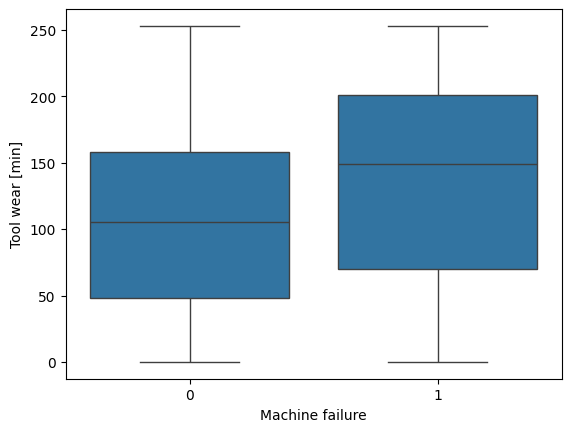

In [22]:
for col in continuous_DF.columns:
    sns.boxplot(x='Machine failure', y=col, data=dataframe)
    plt.show()

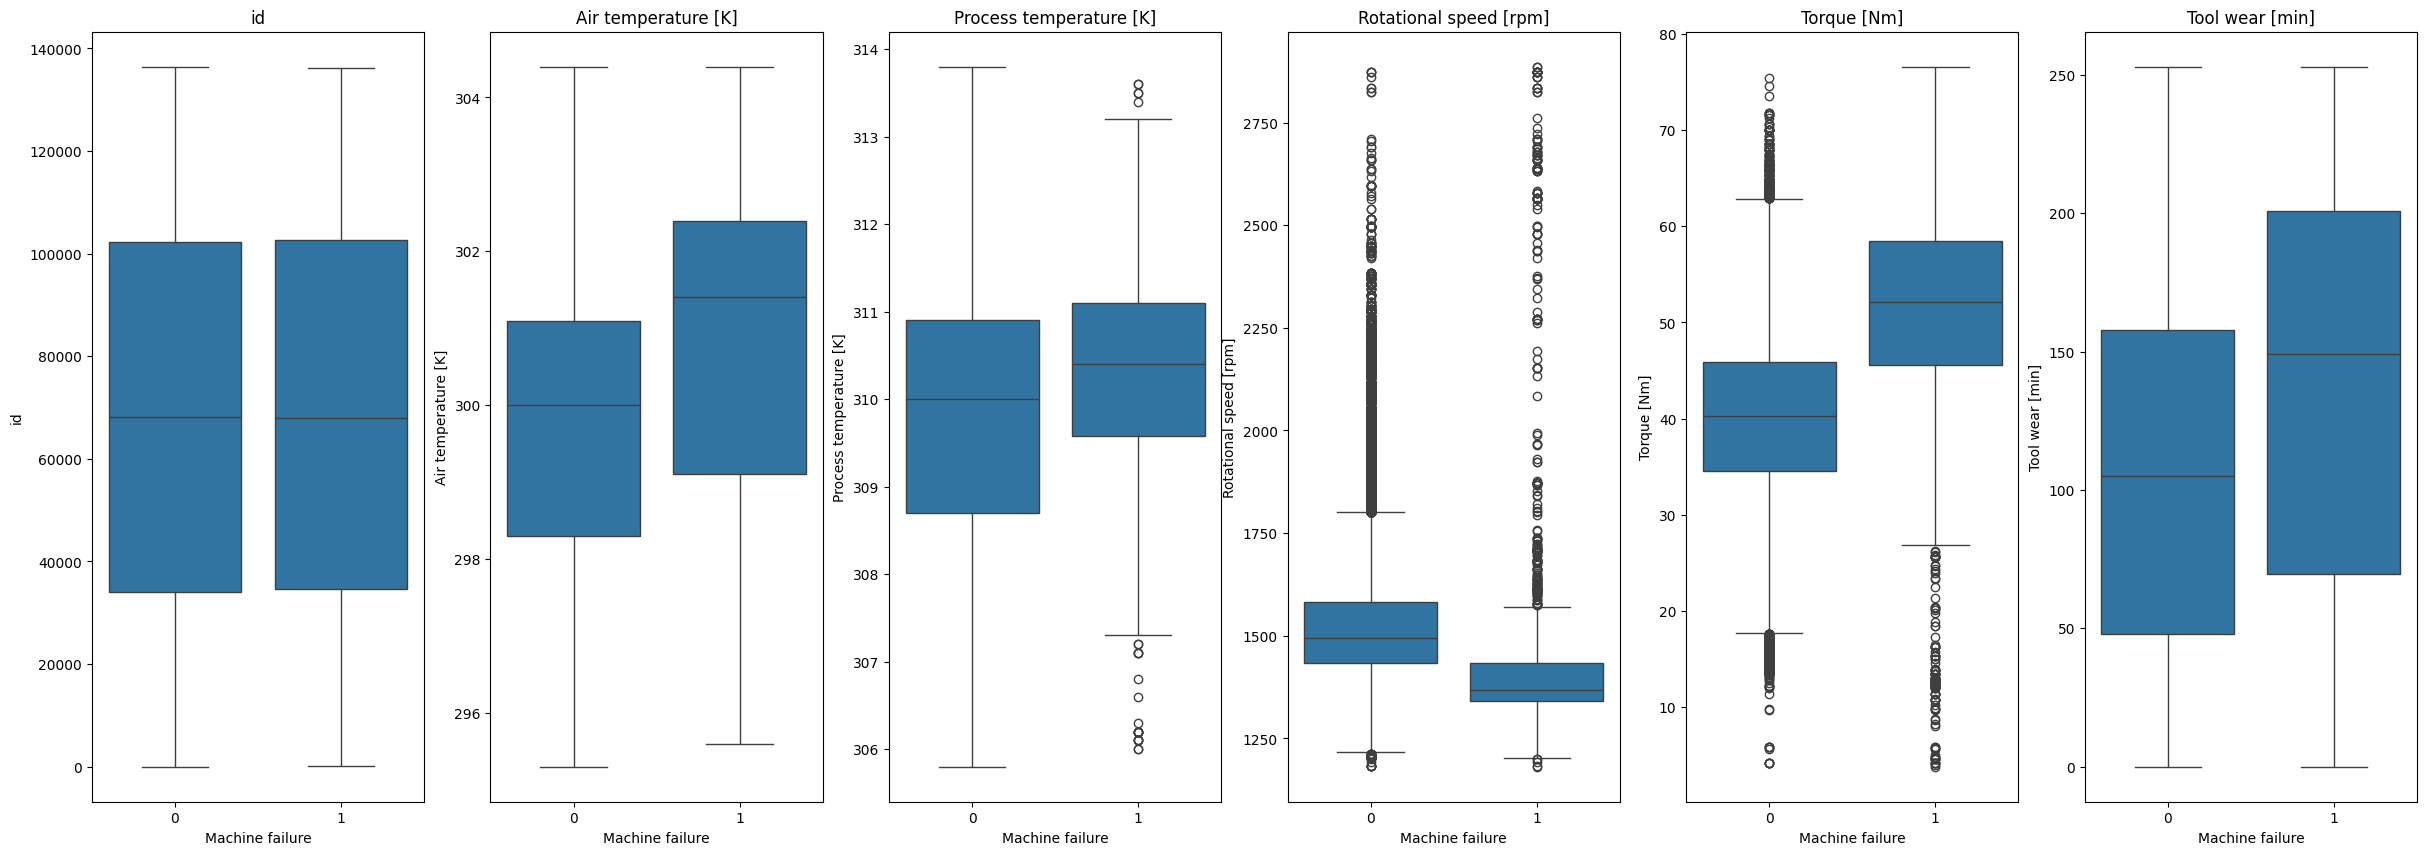

In [23]:
fig, axs = plt.subplots(1, 6, figsize=(30, 10))
## Plotting the boxplot for each continuous variable
for i, col in enumerate(continuous_DF.columns):
    sns.boxplot(x='Machine failure', y=col, data=dataframe, ax=axs[i])
    axs[i].set_title(col)

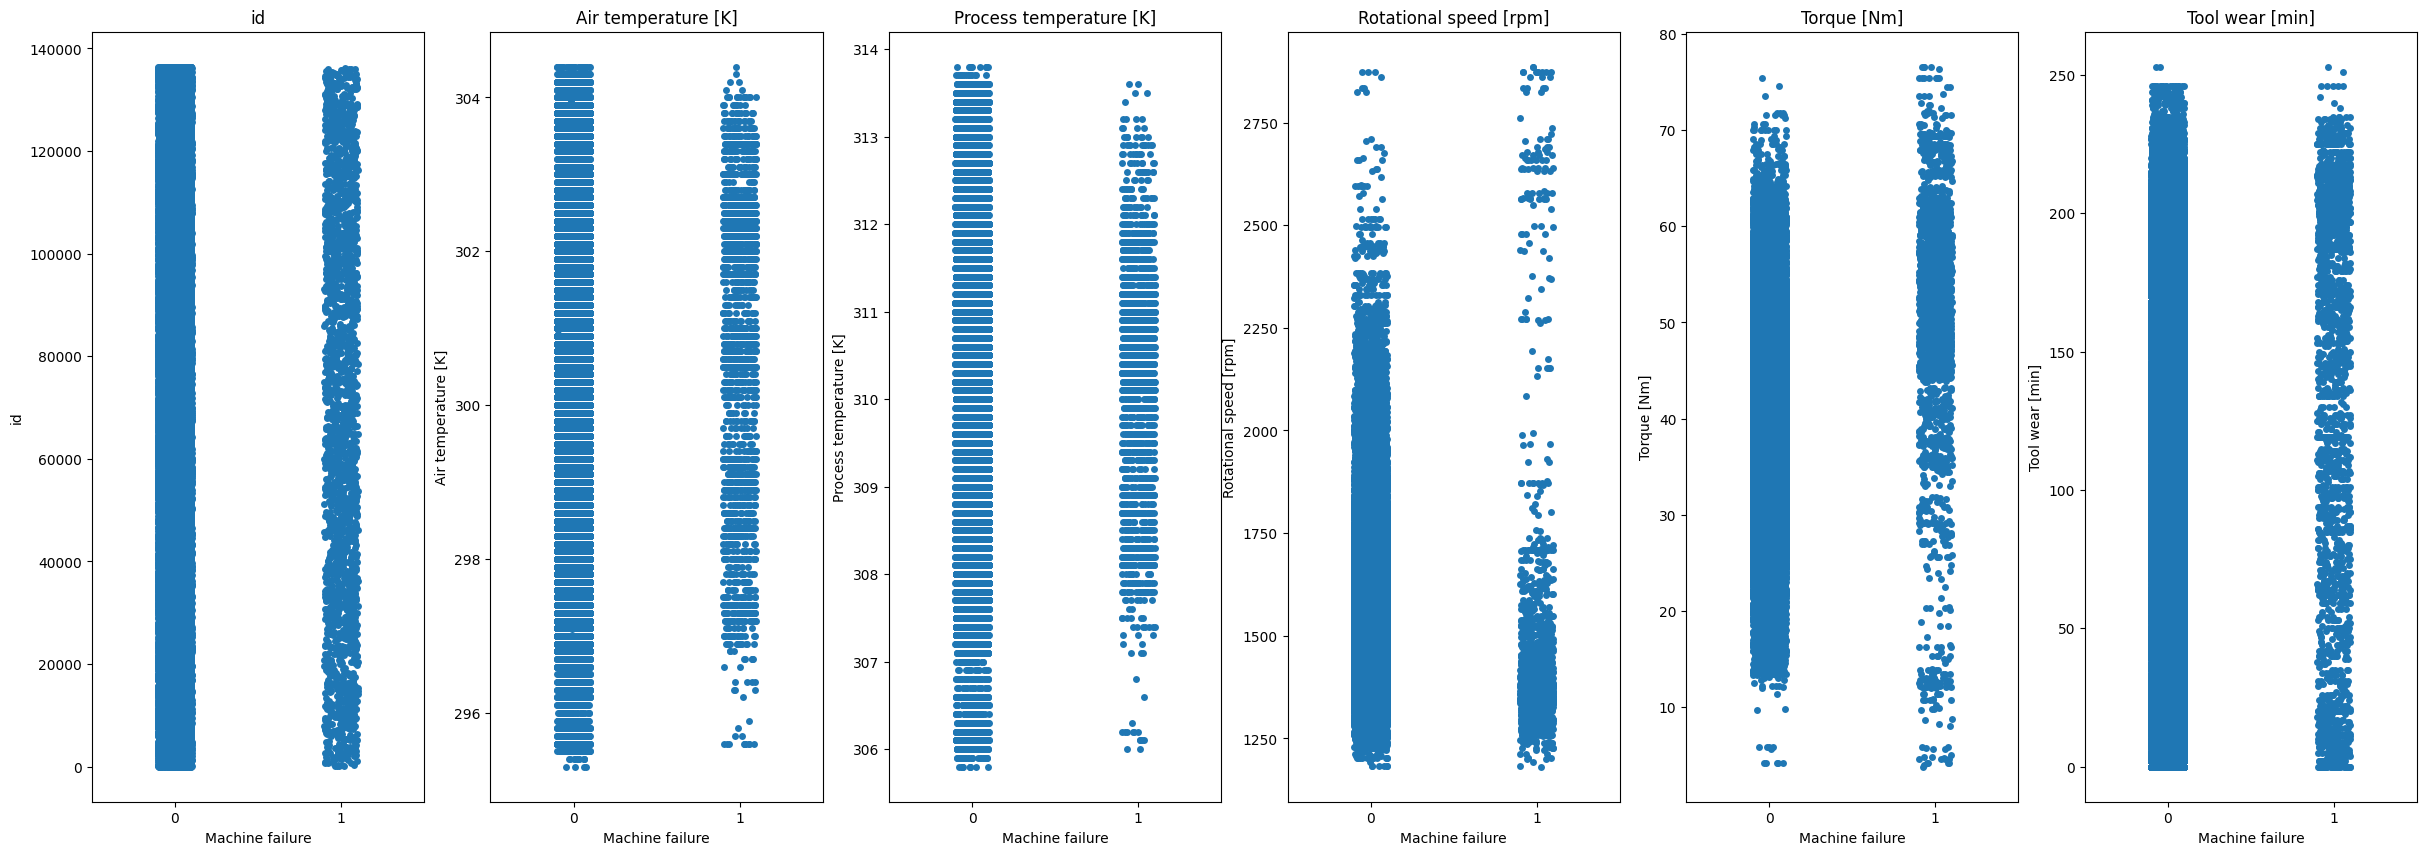

In [24]:
fig, axs = plt.subplots(1, 6, figsize=(30, 10))
## Plotting the boxplot for each categorical variable
for i, col in enumerate(continuous_DF.columns):
    sns.stripplot(x='Machine failure', y=col, data=dataframe, ax=axs[i])
    axs[i].set_title(col)